# Neuronales Netz

## Imports

In [5]:
import pandas as pd # Pandas für die Datenverarbeitung
from tqdm.notebook import tqdm  # Fortschrittsbalken für Iterationen
import numpy as np # NumPy für numerische Berechnungen
import matplotlib.pyplot as plt # Matplotlib für die Visualisierung
from sklearn.datasets import load_iris # Iris-Datensatz laden
from sklearn.model_selection import train_test_split # Datenaufteilung in Trainings- und Testdaten

## Einfaches Beispiel

In [6]:
x1 = 1 # Inputwert 1 Neuron 1 z.B. Turnschuhe
x2 = 3 # Inputwert 2 Neuron 1 z.B. Betrunken


# Diese Gewichte sind willkürlich gewählt um das Beispiel zu verdeutlichen und müssen optimiert werden
w1,w2 = 0.3, 0.3 # Gewichte Neuron 1
w3,w4 = 0.6, 0.6 # Gewichte Neuron 2
w5 = 0.8 # Gewicht Neuron 3
w6 = 0.9 # Gewicht Neuron 3

def sigmoid(x):
    return 1/(1 + np.exp(-x))

n1 = x1*w1+x2*w3 # Berechnung des Neurons 1
n2 = x1*w2+x2*w4 # Berechnung des Neurons 2
n1_out = sigmoid(n1) # Ausgabe des Neurons 1 nach der Aktivierungsfunktion
n2_out = sigmoid(n2) # Ausgabe des Neurons 2 nach der Aktivierungsfunktion

n3 = n1_out*w5+n2_out*w6 # Berechnung des Neurons 3
n3_out = sigmoid(n3) # Ausgabe des Neurons 3 nach der Aktivierungsfunktion


## Datengrundlage

In [7]:
# Daten laden und vorbereiten
data = pd.read_csv("../data/iris.csv")
x = data[["sepal length","sepal width"]].to_numpy() # Inputs (Features)
y = np.where(data["class"] == "Iris-setosa",1,0) # target binarisieren Zielwert (Target): 1 oder 0

# Aufteilen in Training (zum Lernen) und Test (zum Prüfen)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.4, random_state=45)

## Plot Data

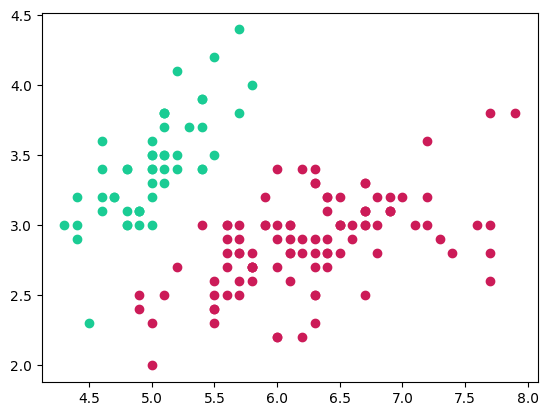

In [8]:
plt.scatter(x[np.where(y==1),:1],x[np.where(y==1),1:],c="#1ACC94",label="True")
plt.scatter(x[np.where(y==0),:1],x[np.where(y==0),1:],c="#CC1B58",label="False")
plt.show()

## Neuronales Netz

In [9]:
class nn:
    def __init__(self,n_features):
        self.w = [np.random.uniform(0,1) for i in range(6)] # baut sich 6 zufällige Gewichte auf
        self.b = [np.random.uniform(0,1) for i in range(2)] # baut sich 2 zufällige Biases auf

    def sigmoid(self,x): # Aktivierungsfunktion
        return 1/(1 + np.exp(-x))

    def sigmoid_diff(self,x):
        e = np.exp(-x)
        return e/(1 + e)**2

    def __call__(self,x):
        self.h1 = self.w[0]*x[0]+self.w[2]*x[1]+self.b[0]
        self.h2 = self.w[1]*x[0]+self.w[3]*x[1]+self.b[0]

        self.h1_out = self.sigmoid(self.h1)
        self.h2_out = self.sigmoid(self.h2)

        self.y = self.h1_out*self.w[4]+self.h2_out*self.w[5]+self.b[1]
        self.y_out = self.sigmoid(self.y)


        return self.y_out

  0%|          | 0/1000 [00:00<?, ?it/s]

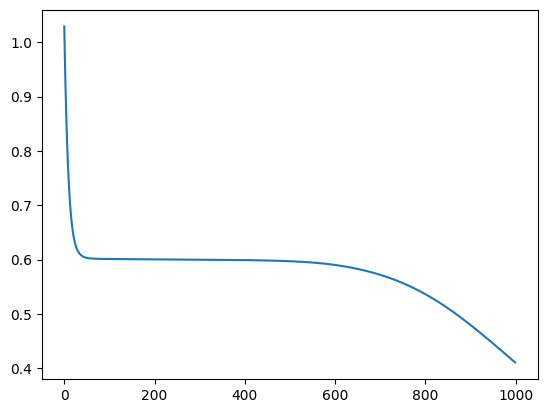

In [10]:
def logloss(prediction, y):
    loss = -np.mean(y*(np.log(prediction)) + (1-y)*np.log(1-prediction)) # Logarithmische Verlustfunktion
    return loss #   Rückgabe des Verlusts

net = nn(2) # Initialisierung des Netzes mit 2 Eingangsfeatures

epoch_loss = []
for epoch in tqdm(range(1000)): # Interationen über Epochen
    batch_loss = []
    for x,y in zip(x_train,y_train):

        # Prediction erzielen und Loss Berechnung
        prediction = net(x)
        loss = logloss(prediction,y)

        lr = 0.001

        # Berechnung der Ableitungen mittels Backpropagation Gradientenverfahren
        A = (-y/(net.y_out)+((1-y)/(1-net.y_out)))*net.sigmoid_diff(net.y)

        deriv_w0 = A*net.w[4]*net.sigmoid_diff(net.h1)*x[:1]
        deriv_w1 = A*net.w[5]*net.sigmoid_diff(net.h2)*x[:1]
        deriv_w2 = A*net.w[4]*net.sigmoid_diff(net.h1)*x[1:]
        deriv_w3 = A*net.w[5]*net.sigmoid_diff(net.h2)*x[1:]
        deriv_w4 = A*net.h1_out
        deriv_w5 = A*net.h2_out

        deriv_b0 = A*(net.w[4]*net.sigmoid_diff(net.h1)+net.w[5]*net.sigmoid_diff(net.h2))
        deriv_b1 = A

        # Anwendung des Gradientenverfahrens
        net.w[0] = net.w[0] - lr * deriv_w0
        net.w[1] = net.w[1] - lr * deriv_w1
        net.w[2] = net.w[2] - lr * deriv_w2
        net.w[3] = net.w[3] - lr * deriv_w3
        net.w[4] = net.w[4] - lr * deriv_w4
        net.w[5] = net.w[5] - lr * deriv_w5

        net.b[0] = net.b[0] - lr * deriv_b0
        net.b[1] = net.b[1] - lr * deriv_b1

        batch_loss.append(loss)

    epoch_loss.append(np.mean(batch_loss))

plt.plot(epoch_loss)

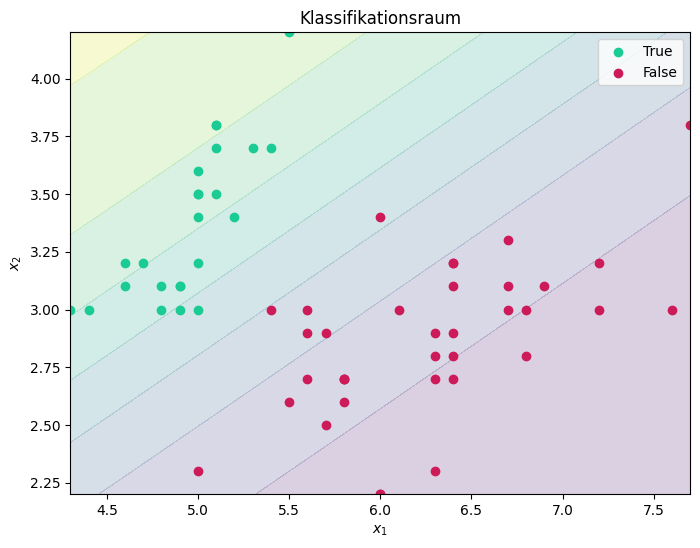

In [11]:
n = 100
z = []

x1_lims = [x_test[:,:1].min(),x_test[:,:1].max()]
x2_lims = [x_test[:,1:].min(),x_test[:,1:].max()]
meshgrid = np.meshgrid(np.linspace(x1_lims[0],x1_lims[1],n),np.linspace(x2_lims[0],x2_lims[1],n))
for value in np.nditer(meshgrid):
    z.append(net(np.array(value)))

plt.figure(figsize=(8,6))
plt.contourf(meshgrid[0],meshgrid[1],np.array(z).reshape(n,n),alpha=0.2)
plt.scatter(x_test[np.where(y_test==1),:1],x_test[np.where(y_test==1),1:],c="#1ACC94",label="True")
plt.scatter(x_test[np.where(y_test==0),:1],x_test[np.where(y_test==0),1:],c="#CC1B58",label="False")
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.xlim(x1_lims[0],x1_lims[1])
plt.ylim(x2_lims[0],x2_lims[1])
plt.legend()
plt.title("Klassifikationsraum")
plt.show()